# Cleaning up Case Data

In [1]:
import pandas as pd

cases = pd.read_csv(
    "/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/00_raw_data/2013_2022_cr_cases.csv",
    low_memory=False,
)
# (1) Subset to the columns we need
cases = cases[
    [
        "case_id",
        "CRRKCY",

        "CRRKCC",
        "CRRKYY",
        "CRRTYP",
        "CRRADD",
        "CRRCTY",
        "CRRDST",
        "CRRZIP",
        "CRREZP",
        "CRRDOB",
        "CRRACE",
        "CRRSEX",
        "CRRPRC",
        "CRRRCD",
        "CRRDTS",
        "CRRTDT",
        "CRRDAT",
        "CRRIDD",
        "CRRBONDT",
        "CRRBONDA",
        "CRRJAIL",
        "CRRJRDT",
        "CRRJCDT",
        "CRRARDT",
        "CRRDOMVL",
    ]
]
# (2) Change the names to something readable
cases.rename(
    columns={
        "CRRKCY": "key_county_num",
        "CRRKCC": "key_century",
        "CRRKYY": "key_year",
        "CRRTYP": "court_type",
        "CRRADD": "def_street_address",
        "CRRCTY": "def_city_address",
        "CRRDST": "def_state_address",
        "CRRZIP": "def_zip_address",
        "CRREZP": "def_ext_zip_address",
        "CRRDOB": "date_of_birth",
        "CRRACE": "race",
        "CRRSEX": "sex",
        "CRRPRC": "process_served",
        "CRRRCD": "case_creation_date",
        "CRRDTS": "process_service_date",
        "CRRTDT": "case_trial_date",
        "CRRDAT": "court_attorney_type",
        "CRRIDD": "indictment_date",
        "CRRBONDT": "bond_type",
        "CRRBONDA": "bond_amount",
        "CRRJAIL": "in_jail_indicator",
        "CRRJRDT": "jail_release_date",
        "CRRJCDT": "jail_commited_date",
        "CRRARDT": "arrest_date",
        "CRRDOMVL": "domestic_violence",
    },
    inplace=True,
)


In [2]:
# (3) Check missing values:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns={0: "Zero Values", 1: "Missing Values", 2: "% of Total Values"}
    )
    mz_table["Total Zero Missing Values"] = (
        mz_table["Zero Values"] + mz_table["Missing Values"]
    )
    mz_table["% Total Zero Missing Values"] = (
        100 * mz_table["Total Zero Missing Values"] / len(df)
    )
    mz_table["Data Type"] = df.dtypes
    mz_table = (
        mz_table[mz_table.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    print(
        "Your selected dataframe has "
        + str(df.shape[1])
        + " columns and "
        + str(df.shape[0])
        + " Rows.\n"
        "There are " + str(mz_table.shape[0]) + " columns that have missing values."
    )
    #         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table


missing_zero_values_table(cases)


Your selected dataframe has 27 columns and 14081546 Rows.
There are 20 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
jail_commited_date,0,14081546,100.0,14081546,100.0,float64
jail_release_date,0,14081546,100.0,14081546,100.0,float64
arrest_date,0,14077506,100.0,14077506,100.0,object
in_jail_indicator,0,14060981,99.9,14060981,99.9,object
domestic_violence,0,13688450,97.2,13688450,97.2,object
indictment_date,0,13329902,94.7,13329902,94.7,object
def_ext_zip_address,0,12420939,88.2,12420939,88.2,object
bond_amount,16686,10549314,74.9,10566000,75.0,float64
bond_type,0,10172331,72.2,10172331,72.2,object
court_attorney_type,0,6014188,42.7,6014188,42.7,object


In [3]:
# Ok, we dont need columns that are 100% missing values:
cases.drop(
    ["jail_commited_date", "jail_release_date", "arrest_date", "in_jail_indicator"],
    axis=1,
)


,case_id,key_county_num,key_county_num,key_century,key_year,court_type,def_street_address,def_city_address,def_state_address,def_zip_address,...,sex,process_served,case_creation_date,process_service_date,case_trial_date,court_attorney_type,indictment_date,bond_type,bond_amount,domestic_violence
0,1973006239,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,...,M,W,2013-10-22,1973-05-20,1974-05-09,R,1973-08-07,SEC,10000.0,NaN
1,1973007828,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,...,M,W,2013-10-22,1973-06-14,1974-05-09,R,1973-08-07,SEC,1.0,NaN
2,1973013840,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,...,M,W,2013-10-22,1973-10-25,1974-05-09,R,1974-01-22,SEC,3000.0,NaN
3,1980007781,0,0,19,80,CR,N CHURCH ST,BURLINGTON,NC,27215,...,F,O,1986-01-07,1986-01-06,1986-01-07,W,NaN,NaN,NaN,NaN
4,1980007782,0,0,19,80,CR,N CHURCH ST,BURLINGTON,NC,27215,...,F,O,1986-01-07,1986-01-06,1986-01-07,W,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081541,9902021700563,990,990,20,21,CR,74 RAY MCCELLAN LN,NEWLAND,NC,28657,...,F,C,2021-06-28,2021-06-26,2021-08-19,NaN,NaN,NaN,NaN,NaN
14081542,9902021700564,990,990,20,21,CR,436 BILL ALLEN BRANC,BURNSVILLE,NC,28714,...,M,C,2021-06-29,2021-06-28,2021-08-19,NaN,NaN,NaN,NaN,NaN
14081543,9902021700565,990,990,20,21,CR,12 BERLINS VW,CANDLER,NC,28715,...,M,C,2021-06-29,2021-06-28,2021-08-19,NaN,NaN,NaN,NaN,NaN
14081544,9902021700566,990,990,20,21,CR,80 VAUGHN LN,SPRUCE PINE,NC,28777,...,F,C,2021-06-29,2021-06-28,2021-08-19,NaN,NaN,NaN,NaN,NaN


In [4]:
# (4) Fix dates
cases["case_creation_date"] = pd.to_datetime(
    cases.case_creation_date, format="%Y-%m-%d", errors="coerce"
)
cases["process_service_date"] = pd.to_datetime(
    cases.process_service_date, format="%Y-%m-%d", errors="coerce"
)
cases["case_trial_date"] = pd.to_datetime(
    cases.case_trial_date, format="%Y-%m-%d", errors="coerce"
)
cases["indictment_date"] = pd.to_datetime(
    cases.indictment_date, format="%Y-%m-%d", errors="coerce"
)


In [5]:
# (5) Create Race-Gender Column
cases["race_gender"] = "Other"
cases.loc[(cases["sex"] == "M") & (cases["race"] == "W"), "race_gender"] = "White Male"
cases.loc[
    (cases["sex"] == "F") & (cases["race"] == "W"), "race_gender"
] = "White Female"
cases.loc[(cases["sex"] == "M") & (cases["race"] == "B"), "race_gender"] = "Black Male"
cases.loc[
    (cases["sex"] == "F") & (cases["race"] == "B"), "race_gender"
] = "Black Female"
cases.loc[
    (cases["sex"] == "M") & (cases["race"] == "H"), "race_gender"
] = "Hispanic Male"
cases.loc[
    (cases["sex"] == "F") & (cases["race"] == "H"), "race_gender"
] = "Hispanic Female"


In [6]:
# (6) Save
cases.to_csv(
    "/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/10_clean_data/cases_v01.csv"
)


# Summary statistics

In [24]:
%config InlineBackend.figure_format = 'retina'
cases.court_type.value_counts() 

CR     12880309
CRS     1201237
Name: court_type, dtype: int64

Text(0.5, 1.0, 'Breakdown of Cases by Court Type in ACIS Data Extract')

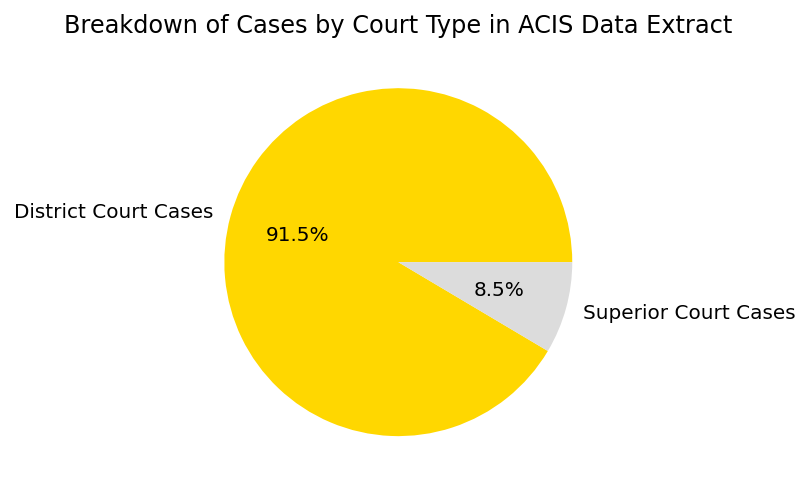

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.pie(
    100 * cases.court_type.value_counts() / len(cases),
    autopct="%1.1f%%",
    labels=["District Court Cases", "Superior Court Cases"],
    colors=["gold", "gainsboro"],
)
plt.title("Breakdown of Cases by Court Type in ACIS Data Extract")


In [26]:
# Missing data analysis:
missing_data = missing_zero_values_table(cases)


Your selected dataframe has 28 columns and 14081546 Rows.
There are 20 columns that have missing values.


In [34]:
missing_data["% Not Missing"] = 100 - missing_data["% of Total Values"]
# missing_data.rename(columns={"% of Total Values": "% Missing"}, inplace=True)
missing_data


KeyError: '% of Total Values'

<AxesSubplot:title={'center':'Patterns in how case and offense information is missing the NC Courts (ACIS) Dataset may explain certain qualities about some types of cases\n\n Missing Case Information'}, xlabel='Selected Case Features for Analysis in the NC Court (ACIS) dataset', ylabel='% Of Missing (Red) and Not Missing (Green) Values'>

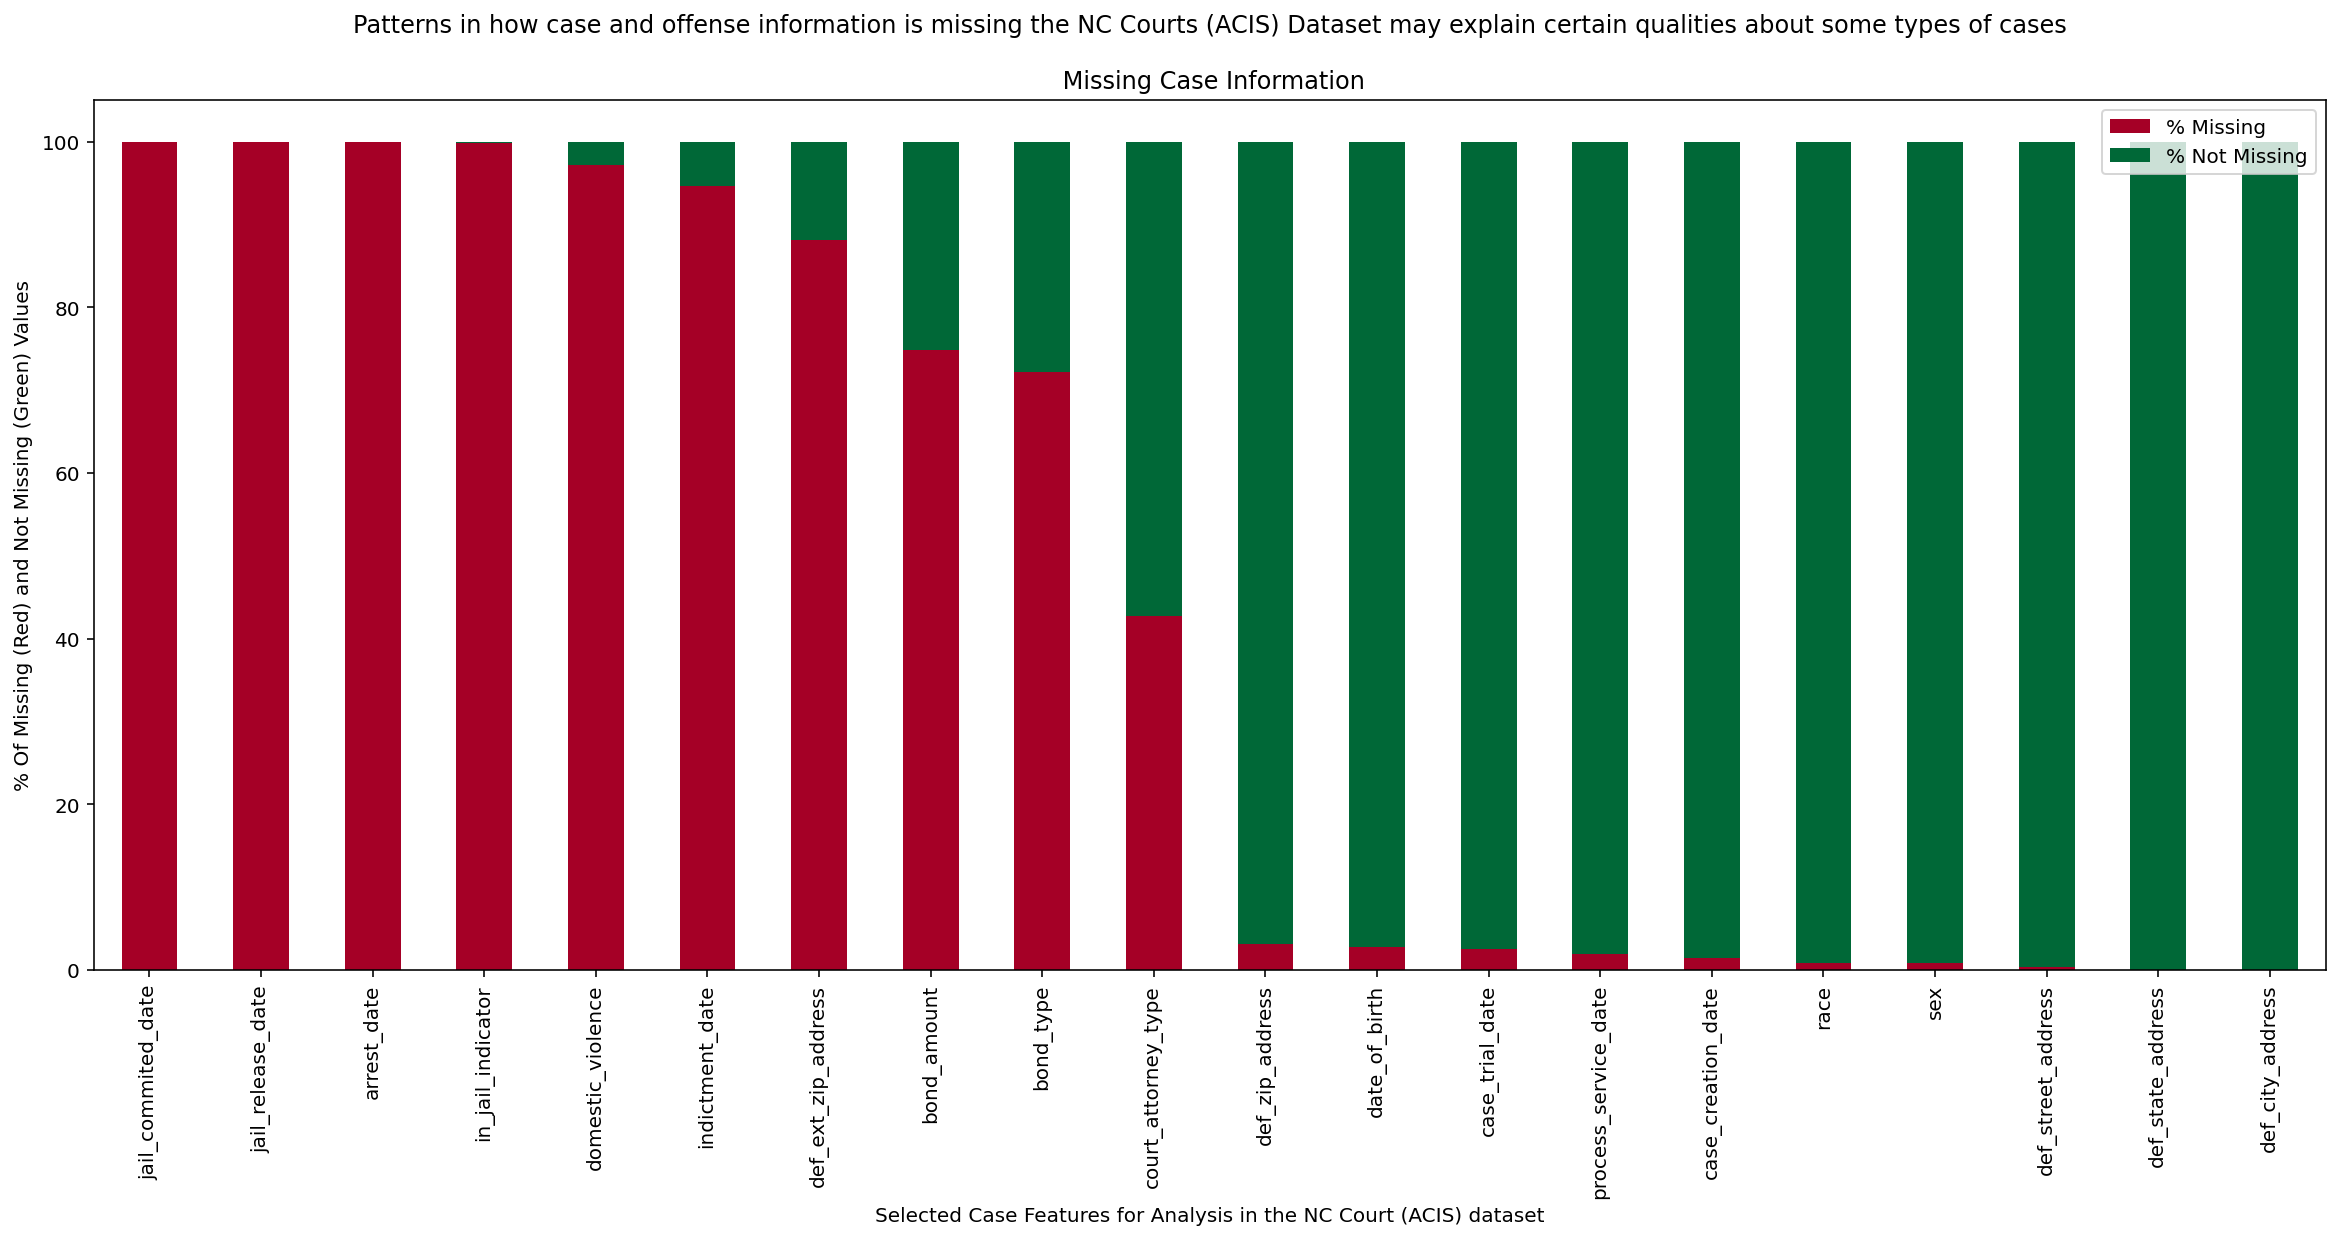

In [40]:
missing_data[["% Missing", "% Not Missing"]].plot(
    kind="bar",
    figsize=(20, 8),
    xlabel="Selected Case Features for Analysis in the NC Court (ACIS) dataset",
    ylabel="% Of Missing (Red) and Not Missing (Green) Values",
    title="Patterns in how case and offense information is missing the NC Courts (ACIS) Dataset may explain certain qualities about some types of cases\n\n Missing Case Information",
    legend=True,
    stacked=True,
    colormap="RdYlGn",
)


In [8]:
cases.key_century.value_counts()


20    13344622
19      736924
Name: key_century, dtype: int64